<a href="https://colab.research.google.com/github/Du-nara/ME421-Mechanical-Systems-Lab-A3/blob/main/Vibration/E_20_301_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E/20/301 - Praveen K.M.G.S.

# Week 01

## Activity 01

## Transverse Vibration Model (Euler–Bernoulli Beam)

For small-amplitude transverse vibrations of a slender beam, Euler–Bernoulli beam theory gives:

$$
\rho A \frac{\partial^2 y}{\partial t^2}
+ c \frac{\partial y}{\partial t}
+ EI \frac{\partial^4 y}{\partial x^4}
+ P \frac{\partial^2 y}{\partial x^2}
= f(t,x)
$$

where $P$ is the axial compressive force, $\rho$ is the density, $E$ is Young’s modulus, $I$ is the second moment of area, $A$ is the cross-sectional area, $c$ is the distributed viscous damping, and $f(t,x)$ is the external transverse load.

Since $P=0$, the PDE becomes:

$$
\rho A \frac{\partial^2 y}{\partial t^2}
+ c \frac{\partial y}{\partial t}
+ EI \frac{\partial^4 y}{\partial x^4}
= f(t,x)
$$

The beam has one end free and the base is elastically restrained in rotation. The rotational stiffness is:

$$
k_{\theta}=k_{\text{spring}}\,l_{\text{spring}}^2
$$

---

## Free Vibration Analysis (Mode Shapes)

Let $\mathfrak{F}$ be the infinite-dimensional vector space of four-times differentiable functions on $[0,L]$.  
Define the linear operator $H:\mathfrak{F}\to\mathfrak{F}$ as:

$$
H=\frac{EI}{\rho A}\frac{\partial^4}{\partial x^4}
$$

Then the equation of motion can be written as:

$$
\frac{\partial^2 y}{\partial t^2}
+ C\frac{\partial y}{\partial t}
+ Hy
= q(t,x)
$$

with

$$
c=C\rho A,
\qquad
f(t,x)=\rho A\,q(t,x)
$$

Assume $H$ has eigenvalues $\{\omega_k^2\}_{k=1}^{\infty}$ and eigenfunctions $\{\psi_k\}_{k=1}^{\infty}$.  
Then the eigenvalue problem is:

$$
H\psi_k(x)=\omega_k^2\psi_k(x)
$$

Substituting $H$:

$$
\frac{EI}{\rho A}\frac{d^4\psi_k(x)}{dx^4}=\omega_k^2\psi_k(x)
$$

or

$$
\frac{d^4\psi_k(x)}{dx^4}
=
\frac{\rho A\omega_k^2}{EI}\psi_k(x)
=
\beta_k^4\psi_k(x)
$$

where

$$
\beta_k^4=\frac{\rho A\omega_k^2}{EI}
$$

---

## Boundary Conditions

The boundary conditions are:

$$
y(0,t)=0
$$

$$
EI\frac{\partial^2 y}{\partial x^2}(0,t)
-k_{\theta}\frac{\partial y}{\partial x}(0,t)=0
$$

$$
\frac{\partial^2 y}{\partial x^2}(l_{\text{beam}},t)=0
$$

$$
\frac{\partial^3 y}{\partial x^3}(l_{\text{beam}},t)=0
$$

---

## General Solution

The general solution of

$$
\psi_k^{(4)}(x)=\beta_k^4\psi_k(x)
$$

is:

$$
\psi_k(x)=A_k\cosh(\beta_k x)
+B_k\sinh(\beta_k x)
+C_k\cos(\beta_k x)
+D_k\sin(\beta_k x)
$$

---

## Base-End Conditions

At $x=0$:

$$
\psi_k(0)=0
\Rightarrow
A_k+C_k=0
\Rightarrow
C_k=-A_k
$$

Also,

$$
\psi_k'(0)=\beta_k(B_k+D_k)
$$

$$
\psi_k''(0)=\beta_k^2(A_k-C_k)
$$

Using the rotational spring condition:

$$
EI\psi_k''(0)-k_{\theta}\psi_k'(0)=0
$$

gives

$$
EI\beta_k^2(A_k-C_k)-k_{\theta}\beta_k(B_k+D_k)=0
$$

Substitute $C_k=-A_k$:

$$
2EI\beta_k^2A_k-k_{\theta}\beta_k(B_k+D_k)=0
$$

---

## Free-End Conditions

At $x=l_{\text{beam}}$:

$$
\psi_k''(l_{\text{beam}})=0
$$

$$
\psi_k'''(l_{\text{beam}})=0
$$

These give:

$$
A_k\big(\cosh(\beta_k l_{\text{beam}})+\cos(\beta_k l_{\text{beam}})\big)
+B_k\sinh(\beta_k l_{\text{beam}})
-D_k\sin(\beta_k l_{\text{beam}})=0
$$

$$
A_k\big(\sinh(\beta_k l_{\text{beam}})-\sin(\beta_k l_{\text{beam}})\big)
+B_k\cosh(\beta_k l_{\text{beam}})
-D_k\cos(\beta_k l_{\text{beam}})=0
$$

---

## Matrix Form

The system can be written as:

$$
\mathbf{H}(\beta_k)
\begin{bmatrix}
A_k\\
B_k\\
D_k
\end{bmatrix}
=
\mathbf{0}
$$

For a non-trivial solution:

$$
\det(\mathbf{H}(\beta_k))=0
$$

Hence, $\beta_k$ can be obtained numerically, and the constants $A_k,B_k,D_k$ can be found from the homogeneous system.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import det
from scipy.optimize import brentq
from scipy.linalg import svd


# ============================================================
# Characteristic determinant for elastically restrained base beam
# ============================================================
def characteristic_determinant(beta, L, EI, k_theta):
    """
    Returns det(H(beta)) where H is the 3x3 characteristic matrix.
    """
    z = beta * L

    csh, sh = np.cosh(z), np.sinh(z)
    c, s = np.cos(z), np.sin(z)

    H = np.array([
        [2.0 * EI * beta**2,     -k_theta * beta,   -k_theta * beta],
        [csh + c,                sh,                -s],
        [sh - s,                 csh,               -c]
    ], dtype=float)

    return det(H)


# ============================================================
# Root finder for beta values (sign-change bracketing + Brent)
# ============================================================
def compute_beta_roots(L, EI, k_theta, n_modes=2, beta_upper=50.0, n_grid=6000):
    """
    Finds first n_modes positive roots of det(H(beta)) = 0.
    """
    beta_grid = np.linspace(1e-6, beta_upper, n_grid)
    det_grid = np.array([characteristic_determinant(b, L, EI, k_theta) for b in beta_grid])

    roots = []
    for j in range(n_grid - 1):
        f1, f2 = det_grid[j], det_grid[j + 1]

        # detect sign change
        if f1 == 0:
            roots.append(beta_grid[j])
        elif f1 * f2 < 0:
            r = brentq(characteristic_determinant,
                       beta_grid[j], beta_grid[j + 1],
                       args=(L, EI, k_theta))
            roots.append(r)

        if len(roots) >= n_modes:
            break

    return np.array(roots, dtype=float)


# ============================================================
# Mode shape coefficient extraction using SVD null space
# ============================================================
def solve_mode_coefficients(beta, L, EI, k_theta):
    """
    Computes constants A,B,C,D for:
        psi(x)=A cosh(bx)+B sinh(bx)+C cos(bx)+D sin(bx)
    using SVD to find the null space of H(beta).

    Unknown vector: [A, B, D]^T and C = -A from BC at x=0.
    """
    z = beta * L

    csh, sh = np.cosh(z), np.sinh(z)
    c, s = np.cos(z), np.sin(z)

    H = np.array([
        [2.0 * EI * beta**2,     -k_theta * beta,   -k_theta * beta],
        [csh + c,                sh,                -s],
        [sh - s,                 csh,               -c]
    ], dtype=float)

    # SVD: last row of V^H corresponds to smallest singular value
    _, _, Vh = svd(H)
    null_vec = Vh[-1, :]   # ~ [A, B, D]

    A, B, D = null_vec
    C = -A
    return A, B, C, D


## Eigenvalues and Eigenfunctions (Mode Shapes)

The eigenvalues of the operator $H$ are:

$$
\{\omega_k^2\}_{k=1}^{\infty}
=
\left\{
\frac{EI}{\rho A}\,\beta_k^4
\right\}_{k=1}^{\infty}
$$

The corresponding eigenfunctions (mode shapes) are:

$$
\{\psi_k(x)\}_{k=1}^{\infty}
=
\left\{
A_k\cosh(\beta_k x)
+
B_k\sinh(\beta_k x)
+
C_k\cos(\beta_k x)
+
D_k\sin(\beta_k x)
\right\}_{k=1}^{\infty}
$$

The constants $A_k$, $B_k$, $C_k$, and $D_k$ are obtained numerically using the previously defined functions.

---

## Forced Vibration Response Using Modal Expansion

When the exciter is switched on, the beam undergoes forced vibration due to an oscillatory force $Q$.

<center>
<div style="text-align: center;">
  <img src="https://github.com/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/Images/E20198_Fig3.png?raw=1"
       width="60%"
       style="display: block; margin: 0 auto;">
  <span style="display: block; text-align: center; margin-top: 5px;">
    <em>Figure 2: Oscillating Force of the Exciter (Reference: TM1016V User Guide 1022, Figure 18)</em>
  </span>
</div>
</center>

Assuming no base excitation, the external loading can be modeled as:

$$
q(x,t)
=
Q\sin(\Omega t)\,\delta(x-l_{\text{exciter}})
$$

Using modal expansion, the PDE can be reduced into decoupled forced and damped SDOF oscillators:

$$
\ddot{y} + C\dot{y} + Hy = q(x,t)
\quad \Rightarrow \quad
m_k\ddot{z}_k
+
2\zeta_k\omega_k m_k \dot{z}_k
+
m_k\omega_k^2 z_k
=
\langle\langle \psi_k(x), q(x,t)\rangle\rangle
$$

where

$$
\zeta_k=\frac{C}{2\omega_k},
\qquad
m_k=\int_{0}^{l_{\text{beam}}}\rho A\,\psi_k^2(x)\,dx
$$

The modal mass $m_k$ removes the arbitrary scaling caused by the selection of $B_k$ and $D_k$.

Solving the decoupled ODE for each mode gives:

$$
z_k(t)=\chi_k(\Omega)\cos\left(\Omega t+\phi_k(\Omega)\right)
$$

where $\chi_k(\Omega)$ is the steady-state amplitude and $\phi_k(\Omega)$ is the phase lag at forcing frequency $\Omega$.

---

## Modal Forcing Term

The mode shapes are orthonormal under the inner product:

$$
\langle\langle \psi_k(x), q(x)\rangle\rangle
=
\int_{0}^{l_{\text{beam}}}\psi_k(x)\,q(x)\,dx
$$

Substituting $q(x,t)$:

$$
\langle\langle \psi_k(x), q(x,t)\rangle\rangle
=
\int_{0}^{l_{\text{beam}}}
\psi_k(x)\,Q\sin(\Omega t)\,\delta(x-l_{\text{exciter}})\,dx
$$

$$
=
Q\sin(\Omega t)
\int_{0}^{l_{\text{beam}}}
\psi_k(x)\,\delta(x-l_{\text{exciter}})\,dx
$$

$$
=
Q\sin(\Omega t)\,\psi_k(l_{\text{exciter}})
$$

---

## Steady-State Amplitude and Phase

The steady-state amplitude is defined as:

$$
\chi_k(\Omega)
=
\left|
\frac{
\langle\langle \psi_k(x), q(x)\rangle\rangle
}{
m_k\sqrt{(\omega_k^2-\Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}
}
\right|
$$

Substituting the forcing projection:

$$
\chi_k(\Omega)
=
\left|
\frac{
Q\,\psi_k(l_{\text{exciter}})
}{
m_k\sqrt{(\omega_k^2-\Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}
}
\right|
$$

The phase lag is:

$$
\phi_k(\Omega)
=
\arctan\left(
\frac{2\zeta_k\Omega\omega_k}{\omega_k^2-\Omega^2}
\right)
$$

Hence, the infinite-dimensional response is:

$$
y(t,x)
=
\sum_{k=1}^{\infty} z_k(t)\psi_k(x)
=
\sum_{k=1}^{\infty}
\chi_k(\Omega)\cos\left(\Omega t+\phi_k(\Omega)\right)\psi_k(x)
$$

---

## Reduction to a 2-DOF Model (First Two Dominant Modes)

Truncating to the first two modes gives:

$$
y(t,x)
\approx
\chi_1(\Omega)\cos(\Omega t+\phi_1(\Omega))\,\psi_1(x)
+
\chi_2(\Omega)\cos(\Omega t+\phi_2(\Omega))\,\psi_2(x)
$$

The corresponding reduced 2-DOF system is:

$$
\underbrace{
\begin{bmatrix}
m_1 & 0\\
0 & m_2
\end{bmatrix}
}_{M_{\text{beam}}}
\begin{bmatrix}
\ddot{z}_1\\
\ddot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
2\zeta_1\omega_1 m_1 & 0\\
0 & 2\zeta_2\omega_2 m_2
\end{bmatrix}
}_{C_{\text{beam}}}
\begin{bmatrix}
\dot{z}_1\\
\dot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
\omega_1^2 m_1 & 0\\
0 & \omega_2^2 m_2
\end{bmatrix}
}_{K_{\text{beam}}}
\begin{bmatrix}
z_1\\
z_2
\end{bmatrix}
=
\underbrace{
\begin{bmatrix}
Q\psi_1(l_{\text{exciter}})\sin(\Omega t)\\[1mm]
Q\psi_2(l_{\text{exciter}})\sin(\Omega t)
\end{bmatrix}
}_{F_{\text{exciter}}}
$$

---

## Spring–Damper Attachment Effects

<center>
<div style="text-align: center;">
  <img src="https://github.com/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/Images/E20198_Fig2.png?raw=1"
       width="55%"
       style="display: block; margin: 0 auto;">
  <span style="display: block; text-align: center; margin-top: 5px;">
    <em>Figure 3: Schematic Details of the Viscous Damper (Reference: TM1016V User Guide 1022, Figure 13)</em>
  </span>
</div>
</center>

### Part I: Additional Mass Contribution

According to Rayleigh’s theory, the effective spring mass contribution is one third of the spring mass, plus the fixing mass:

$$
m_{\text{eff}}
=
\frac{1}{3}m_{\text{spring}}+m_{\text{fixed}}
$$

Using the two-mode approximation, the transverse acceleration at the spring location is:

$$
\ddot{y}(l_{\text{spring}},t)
=
\ddot{z}_1(t)\psi_1(l_{\text{spring}})
+
\ddot{z}_2(t)\psi_2(l_{\text{spring}})
$$

The inertia force from the attached effective mass is:

$$
F_{\text{inertia}}(t)
=
m_{\text{eff}}\,\ddot{y}(l_{\text{spring}},t)
$$

Modal inertia force contribution for each mode:

$$
F_k^{(m)}(t)
=
F_{\text{inertia}}(t)\,\psi_k(l_{\text{spring}})
$$

This leads to the matrix form:

$$
\begin{bmatrix}
F_1^{(m)}\\
F_2^{(m)}
\end{bmatrix}
=
M_{\text{spring}}
\begin{bmatrix}
\ddot{z}_1\\
\ddot{z}_2
\end{bmatrix}
$$

where

$$
M_{\text{spring}}
=
m_{\text{eff}}
\begin{bmatrix}
\psi_1^2(l_{\text{spring}}) &
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}})\\
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) &
\psi_2^2(l_{\text{spring}})
\end{bmatrix}
$$

Similarly, the additional mass matrices for damper and exciter are:

$$
M_{\text{damper}}
=
m_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}})\\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
$$

$$
M_{\text{exciter}}
=
m_{\text{exciter}}
\begin{bmatrix}
\psi_1^2(l_{\text{exciter}}) &
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}})\\
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) &
\psi_2^2(l_{\text{exciter}})
\end{bmatrix}
$$

---

### Part II: Damper Attachment (Viscous Damping Force)

For the viscous damper:

$$
F_{\text{damper}}(t)=c_{\text{damper}}\,\dot{y}(l_{\text{damper}},t)
$$

Using the two-mode approximation:

$$
\dot{y}(l_{\text{damper}},t)
=
\dot{z}_1(t)\psi_1(l_{\text{damper}})
+
\dot{z}_2(t)\psi_2(l_{\text{damper}})
$$

Projecting onto the $k^{\text{th}}$ modal coordinate gives:

$$
F_k^{(c)}(t)
=
c_{\text{damper}}
\left(
\dot{z}_1\psi_1(l_{\text{damper}})
+
\dot{z}_2\psi_2(l_{\text{damper}})
\right)
\psi_k(l_{\text{damper}})
$$

Thus:

$$
\begin{bmatrix}
F_1^{(c)}\\
F_2^{(c)}
\end{bmatrix}
=
C_{\text{damper}}
\begin{bmatrix}
\dot{z}_1\\
\dot{z}_2
\end{bmatrix}
$$

where

$$
C_{\text{damper}}
=
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}})\\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
$$

---

## Final Reduced 2-DOF System

Including beam contributions and the spring/damper/exciter effects, the reduced system becomes:

$$
\left(
M_{\text{beam}}
+
M_{\text{spring}}
+
M_{\text{damper}}
+
M_{\text{exciter}}
\right)\ddot{\mathbf{z}}
+
\left(
C_{\text{beam}}
+
C_{\text{damper}}
\right)\dot{\mathbf{z}}
+
K_{\text{beam}}\mathbf{z}
=
F_{\text{exciter}}
$$

where

$$
M,\;C,\;K\in\mathbb{M}_{2\times 2},
\qquad
\mathbf{F},\;\mathbf{z}\in\mathbb{R}^{2}
$$


Functions

In [11]:
import numpy as np
from numpy.linalg import det
from scipy.linalg import svd
from scipy.optimize import brentq
from scipy.integrate import quad

# ========= Determinant of Characteristic Matrix =========
def char_det(beta, l_beam, EI, k_theta):
    bL = beta * l_beam
    H = np.array([
        [2*EI*beta**2, -k_theta*beta, -k_theta*beta],
        [np.cosh(bL)+np.cos(bL), np.sinh(bL), -np.sin(bL)],
        [np.sinh(bL)-np.sin(bL), np.cosh(bL), -np.cos(bL)]
    ])
    return det(H)

# ========= Find beta roots =========
def find_betas(l_beam, EI, k_theta, n_roots=2, beta_max=50):
    betas = []
    beta_vals = np.linspace(1e-4, beta_max, 5000)
    f_vals = [char_det(b, l_beam, EI, k_theta) for b in beta_vals]

    for i in range(len(beta_vals)-1):
        if f_vals[i]*f_vals[i+1] < 0:
            root = brentq(char_det, beta_vals[i], beta_vals[i+1],
                          args=(l_beam, EI, k_theta))
            betas.append(root)
            if len(betas) >= n_roots:
                break
    return np.array(betas)

# ========= Solve for mode shape coefficients =========
def mode_shape_coefficients(beta, l_beam, EI, k_theta):
    bL = beta * l_beam
    H = np.array([
        [2*EI*beta**2, -k_theta*beta, -k_theta*beta],
        [np.cosh(bL)+np.cos(bL), np.sinh(bL), -np.sin(bL)],
        [np.sinh(bL)-np.sin(bL), np.cosh(bL), -np.cos(bL)]
    ])
    U, S, Vh = svd(H)
    v = Vh[-1, :].copy()  # vector ~ [A, B, D]
    A, B, D = v
    C = -A
    return A, B, C, D

# ========= Mode shape function =========
def mode_shape(x, beta, l_beam, EI, k_theta):
    A, B, C, D = mode_shape_coefficients(beta, l_beam, EI, k_theta)
    return A*np.cosh(beta*x) + B*np.sinh(beta*x) + C*np.cos(beta*x) + D*np.sin(beta*x)


Beam Properties and Calculations

In [12]:
# ================= Beam Properties =================
b = 0.025
h = 0.01
A = b*h
m_beam = 1.65
l_beam = 0.815
E = 2e11
I = b*h**3/12
rho = m_beam/(A*l_beam)
EI = E*I

# ================= Spring Properties =================
k_spring = 3800
l_spring = 0.75
m_spring = 0.388
m_fixed = 0.009
k_theta = k_spring * l_spring**2

# ================= Damper Properties =================
l_damper = 0.2
m_damper = 0.53

# ================= Exciter Properties =================
l_exciter = 0.4
m_exciter = 4.2

# ================= Find first two betas =================
betas = find_betas(l_beam, EI, k_theta, n_roots=2)
beta1, beta2 = betas
print(f"beta1 = {beta1:.4f}, beta2 = {beta2:.4f}")

# ================= Evaluate psi at key points =================
def eval_psi(beta):
    return {
        "spring": mode_shape(l_spring, beta, l_beam, EI, k_theta),
        "damper": mode_shape(l_damper, beta, l_beam, EI, k_theta),
        "exciter": mode_shape(l_exciter, beta, l_beam, EI, k_theta)
    }

psi1 = eval_psi(beta1)
psi2 = eval_psi(beta2)
print(f"psi1(l_spring)={psi1['spring']:.4f}, psi2(l_spring)={psi2['spring']:.4f}")
print(f"psi1(l_damper)={psi1['damper']:.4f}, psi2(l_damper)={psi2['damper']:.4f}")
print(f"psi1(l_exciter)={psi1['exciter']:.4f}, psi2(l_exciter)={psi2['exciter']:.4f}")

# ================= Modal Mass =================
def modal_mass(beta):
    integrand = lambda x: rho*A*mode_shape(x,beta,l_beam,EI,k_theta)**2
    m, _ = quad(integrand,0,l_beam)
    return m

m1 = modal_mass(beta1)
m2 = modal_mass(beta2)

# ================= Natural frequencies =================
omega1 = beta1**2 * np.sqrt(EI/(rho*A))
omega2 = beta2**2 * np.sqrt(EI/(rho*A))
print(f"Modal masses: m1={m1:.4f}, m2={m2:.4f}")
print(f"Natural frequencies: omega1={omega1:.4f}, omega2={omega2:.4f}")

# ================= Beam, spring, damper, exciter matrices =================
M_beam = np.diag([m1, m2])
K_beam = np.diag([m1*omega1**2, m2*omega2**2])

# Effective spring mass (Rayleigh 1/3 rule)
m_eff_spring = m_spring/3 + m_fixed

def added_mass_matrix(mass, psi_vals):
    psi1, psi2 = psi_vals['spring'], psi_vals['damper']
    return mass * np.array([[psi1**2, psi1*psi2],[psi1*psi2, psi2**2]])

M_spring = m_eff_spring * np.array([[psi1['spring']**2, psi1['spring']*psi2['spring']],
                                    [psi1['spring']*psi2['spring'], psi2['spring']**2]])
M_damper = m_damper * np.array([[psi1['damper']**2, psi1['damper']*psi2['damper']],
                                [psi1['damper']*psi2['damper'], psi2['damper']**2]])
M_exciter = m_exciter * np.array([[psi1['exciter']**2, psi1['exciter']*psi2['exciter']],
                                 [psi1['exciter']*psi2['exciter'], psi2['exciter']**2]])

def print_matrix(name, M):
    print(f"\n{name}:")
    for r in M:
        print("  [" + ", ".join(f"{v:10.3f}" for v in r) + "]")

print_matrix("M_beam", M_beam)
print_matrix("M_spring", M_spring)
print_matrix("M_damper", M_damper)
print_matrix("M_exciter", M_exciter)
print_matrix("K_beam", K_beam)


beta1 = 1.9417, beta2 = 5.1942
psi1(l_spring)=-1.3706, psi2(l_spring)=-0.8789
psi1(l_damper)=-0.2491, psi2(l_damper)=0.7102
psi1(l_exciter)=-0.6133, psi2(l_exciter)=0.8923
Modal masses: m1=1.0818, m2=0.7688
Natural frequencies: omega1=54.0892, omega2=387.0553

M_beam:
  [     1.082,      0.000]
  [     0.000,      0.769]

M_spring:
  [     0.260,      0.167]
  [     0.167,      0.107]

M_damper:
  [     0.033,     -0.094]
  [    -0.094,      0.267]

M_exciter:
  [     1.580,     -2.298]
  [    -2.298,      3.344]

K_beam:
  [  3164.958,      0.000]
  [     0.000, 115171.455]


# Activity 02

The dynamic behavior of the 2-DOF system with additional attachments can be expressed as:

$$
\mathbf{M} \, \mathbf{\ddot{z}}(t) + \mathbf{C} \, \mathbf{\dot{z}}(t) + \mathbf{K} \, \mathbf{z}(t) = \mathbf{F}_{\text{exciter}}(t)
$$

where the mass, damping, and stiffness matrices are composed as follows:

$$
\mathbf{M} = \mathbf{M_\text{beam}} + \mathbf{M_\text{spring}} + \mathbf{M_\text{damper}} + \mathbf{M_\text{exciter}}, \quad
\mathbf{C} = \mathbf{C_\text{beam}} + \mathbf{C_\text{damper}}, \quad
\mathbf{K} = \mathbf{K_\text{beam}}
$$

To investigate the **free vibration characteristics** of the system, we neglect external forcing and solve:

$$
\mathbf{M} \, \mathbf{\ddot{z}}(t) + \mathbf{C} \, \mathbf{\dot{z}}(t) + \mathbf{K} \, \mathbf{z}(t) = \mathbf{0}
$$

Assuming **undamped motion** (i.e., ignoring $\mathbf{C}$) and a harmonic solution of the form:

$$
\mathbf{z}(t) = \boldsymbol{\phi} \, e^{j \omega t}
$$

we obtain the standard eigenvalue problem for the system:

\begin{align*}
(\mathbf{K} - \omega^2 \mathbf{M}) \, \boldsymbol{\phi} &= \mathbf{0} \\
\text{det}(\mathbf{K} - \omega^2 \mathbf{M}) &= 0
\end{align*}

Solving this characteristic equation yields the **two natural frequencies** $\omega_1$ and $\omega_2$ along with their corresponding **mode shapes** $\boldsymbol{\phi}_1$ and $\boldsymbol{\phi}_2$, where each mode shape vector lies in $\mathbb{R}^2$.  

The **modal matrix**, which collects the normalized mode shapes of the system, can then be written as:

$$
\boldsymbol{\Phi} =
\begin{bmatrix}
\boldsymbol{\phi}_1 & \boldsymbol{\phi}_2
\end{bmatrix}
$$

Numerical evaluation of the matrices $\mathbf{M}$ and $\mathbf{K}$ allows direct computation of these **natural frequencies** and **mode shapes** for the 2-DOF system with spring, damper, and exciter attachments.


In [14]:
import numpy as np
from scipy.linalg import eigh  # make sure eigh is imported

# ================= Compute Natural Frequencies for Complete System =================
# Assemble total mass and stiffness matrices
M_total = M_beam + M_spring + M_damper + M_exciter
K_total = K_beam  # stiffness only from the beam

# Solve the generalized eigenvalue problem K*phi = omega^2 * M*phi
eigenvalues, eigenvectors = eigh(K_total, M_total)
natural_frequencies = np.sqrt(eigenvalues)

# Display the results in rad/s and Hz
print("Natural frequencies of the system including attachments:")
for idx, freq in enumerate(natural_frequencies, start=1):
    print(f"Mode {idx}: {freq:.3f} rad/s = {freq/(2*np.pi):.3f} Hz")

# Store the mode shapes in a modal matrix
ModalMatrix = eigenvectors

# Function to nicely print 2x2 matrices
def print_matrix(name, M):
    print(f"\n{name}:")
    for r in M:
        print("  [" + ", ".join(f"{v:10.3f}" for v in r) + "]")

print_matrix("Modal Matrix", ModalMatrix)


Natural frequencies of the system including attachments:
Mode 1: 32.472 rad/s = 5.168 Hz
Mode 2: 204.048 rad/s = 32.475 Hz

Modal Matrix:
  [    -0.573,      0.461]
  [     0.012,      0.596]


Let us introduce a **modal coordinate vector** $\mathbf{q}(t)$ such that the physical displacements $\mathbf{z}(t)$ are expressed in terms of the system’s mode shapes:

$$
\mathbf{z}(t) = \boldsymbol{\Phi} \, \mathbf{q}(t)
$$

Substituting this into the original **forced vibration equation** of the system:

$$
\mathbf{M} \mathbf{\ddot{z}} + \mathbf{C} \mathbf{\dot{z}} + \mathbf{K} \mathbf{z} = \mathbf{F}_{\text{exciter}}
$$

we obtain:

$$
\mathbf{M} \boldsymbol{\Phi} \, \mathbf{\ddot{q}} + \mathbf{C} \boldsymbol{\Phi} \, \mathbf{\dot{q}} + \mathbf{K} \boldsymbol{\Phi} \, \mathbf{q} = \mathbf{F}_{\text{exciter}}
$$

By **pre-multiplying** both sides with the transpose of the modal matrix, $\boldsymbol{\Phi}^T$, we can define the **modal matrices** as:

\begin{align*}
\mathbf{M}_m &= \boldsymbol{\Phi}^T \mathbf{M} \boldsymbol{\Phi} \\
\mathbf{C}_m &= \boldsymbol{\Phi}^T \mathbf{C} \boldsymbol{\Phi} \\
\mathbf{K}_m &= \boldsymbol{\Phi}^T \mathbf{K} \boldsymbol{\Phi} \\
\mathbf{F}_m &= \boldsymbol{\Phi}^T \mathbf{F}_{\text{exciter}}
\end{align*}

so that the **modal equations of motion** take the compact form:

$$
\mathbf{M}_m \, \mathbf{\ddot{q}} + \mathbf{C}_m \, \mathbf{\dot{q}} + \mathbf{K}_m \, \mathbf{q} = \mathbf{F}_m
$$

For **undamped free vibrations**, and using the eigenvectors of $(\mathbf{K}, \mathbf{M})$, the **modal mass** $\mathbf{M}_m$ and **modal stiffness** $\mathbf{K}_m$ matrices are **diagonal**. This implies that in the absence of damping, each mode behaves as an **independent single-degree-of-freedom oscillator**:

$$
\mathbf{M}_m \, \mathbf{\ddot{q}} + \mathbf{C}_m \, \mathbf{\dot{q}} + \mathbf{K}_m \, \mathbf{q} = 0
$$

If the damping matrix $\mathbf{C}_m$ is also diagonal (i.e., damping does not couple the modes), then each modal coordinate $q_k(t)$ satisfies the classical 1-DOF equation:

$$
\ddot{q}_k + 2 \zeta_k \omega_k \dot{q}_k + \omega_k^2 q_k = 0
$$

From the general definition of **modal damping ratio**, we can write:

$$
\zeta_k = \frac{\boldsymbol{\phi}_k^T \mathbf{C} \, \boldsymbol{\phi}_k}{2 \, \omega_k \, \boldsymbol{\phi}_k^T \mathbf{M} \, \boldsymbol{\phi}_k} \tag{2}
$$

In our system, the damping matrix $\mathbf{C}$ consists of contributions from the beam itself and the additional viscous damper:

$$
\mathbf{C} = \mathbf{C}_{\text{beam}} + \mathbf{C}_{\text{damper}}
$$

The **beam damping matrix** $\mathbf{C}_{\text{beam}}$ is diagonal in the modal space due to the orthogonality of the eigenvectors of the beam alone. The **damper contribution** in physical coordinates is given by:

\begin{align*}
\mathbf{C}_{\text{damper}} &= c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) & \psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) & \psi_2^2(l_{\text{damper}})
\end{bmatrix}
\end{align*}

where $\psi_1(x)$ and $\psi_2(x)$ are the **mode shapes of the beam alone**, evaluated at the damper location $l_{\text{damper}}$.  

By projecting the damper matrix into the modal space, it is possible to account for **modal damping ratios** of the full system, while maintaining a **diagonal approximation** if modal coupling is negligible. This allows each mode to be treated as a **quasi-independent 1-DOF oscillator**, simplifying the analysis of forced and free vibration responses.


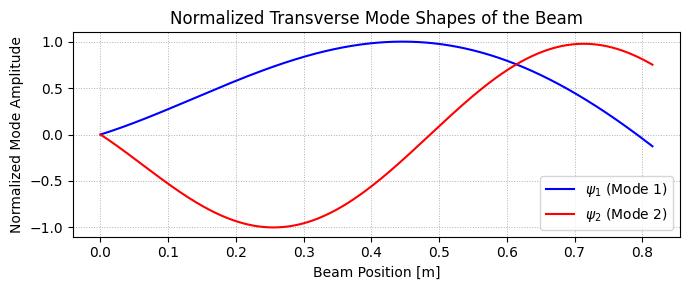

In [17]:
# ================= Plotting Beam Mode Shapes =================
# Discretize the beam along its length
positions = np.linspace(0, l_beam, 1000)

# Compute mode shapes at all positions
mode_shape_1 = psi(positions, beta1, l_beam, E*I, k_theta)
mode_shape_2 = psi(positions, beta2, l_beam, E*I, k_theta)

# Normalize the mode shapes for comparison
mode_shape_1 /= np.max(np.abs(mode_shape_1))
mode_shape_2 /= np.max(np.abs(mode_shape_2))

# Plot the normalized mode shapes
plt.figure(figsize=(7, 3))
plt.plot(positions, mode_shape_1, color='blue', label=r'$\psi_1$ (Mode 1)')
plt.plot(positions, mode_shape_2, color='red', label=r'$\psi_2$ (Mode 2)')

plt.xlabel('Beam Position [m]')
plt.ylabel('Normalized Mode Amplitude')
plt.title('Normalized Transverse Mode Shapes of the Beam')
plt.grid(True, which='both', linestyle=':', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


From the results obtained, it can be observed that at $l_{damper} = 0.2\,\text{m}$, the magnitude of $\psi_1(l_{damper})$ is much smaller than that of $\psi_2(l_{damper})$. Specifically, the computed values are $\psi_1(l_{damper}) = -0.2491$ and $\psi_2(l_{damper}) = 0.7102$. Consequently, we have:

$$
\psi_2^2(l_{damper}) = 0.5044, \quad \psi_1(l_{damper})\psi_2(l_{damper}) = -0.1769
$$

Hence, $|\psi_1(l_{damper})| \ll |\psi_2(l_{damper})|$, allowing us to neglect the off-diagonal elements of $C_{damper}$, indicating that mode coupling is minimal. Therefore, we adopt **Rayleigh proportional damping** for this system:

$$
\mathbf{C} = \alpha\,\mathbf{M} + \beta\,\mathbf{K}
$$

Then, for a mode shape $\phi_k$:

$$
\phi_k^T\mathbf{C}\phi_k = \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta\,\phi_k^T\mathbf{K}\phi_k \tag{3}
$$

Recall the eigenvalue relation:

\begin{align*}
(\mathbf{K}-\omega^2\mathbf{M})\phi &= 0 \\
\phi_k^T\mathbf{K}\phi_k &= \omega_k^2 \phi_k^T \mathbf{M} \phi_k
\end{align*}

Substituting this into equation $(3)$ gives:

\begin{align*}
\phi_k^T\mathbf{C}\phi_k &= \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta (\omega_k^2 \phi_k^T\mathbf{M}\phi_k) \\
\phi_k^T\mathbf{C}\phi_k &= (\alpha + \beta \omega_k^2) \phi_k^T \mathbf{M} \phi_k
\end{align*}

Using the definition of modal damping ratio:

$$
\zeta_k = \frac{\phi_k^T \mathbf{C} \phi_k}{2 \omega_k \phi_k^T \mathbf{M} \phi_k}
$$

leads to:

$$
\zeta_k = \frac{1}{2} \left( \frac{\alpha}{\omega_k} + \beta \omega_k \right)
$$

Since $|\psi_1(l_{beam})| \ll |\psi_2(l_{beam})|$, the damper is positioned near the antinode of the second mode and near the node of the first mode. This implies the damping primarily influences the second, higher-frequency mode. Therefore, the system can be approximated using stiffness-proportional damping ($\zeta_2 > \zeta_1$) by taking $\alpha = 0$:

$$
\zeta_k = \frac{\beta \omega_k}{2}
$$

Given that the exciter in the experiment operates up to 17 Hz and $\omega_2 > 17$ Hz, only $\zeta_1$ at $\omega_1$ can be measured directly. The second-mode damping can then be determined using:

$$
\zeta_1 = \frac{\beta \omega_1}{2}, \quad \zeta_2 = \frac{\beta \omega_2}{2}
$$

or equivalently:

$$
\zeta_2 = \zeta_1 \frac{\omega_2}{\omega_1}
$$


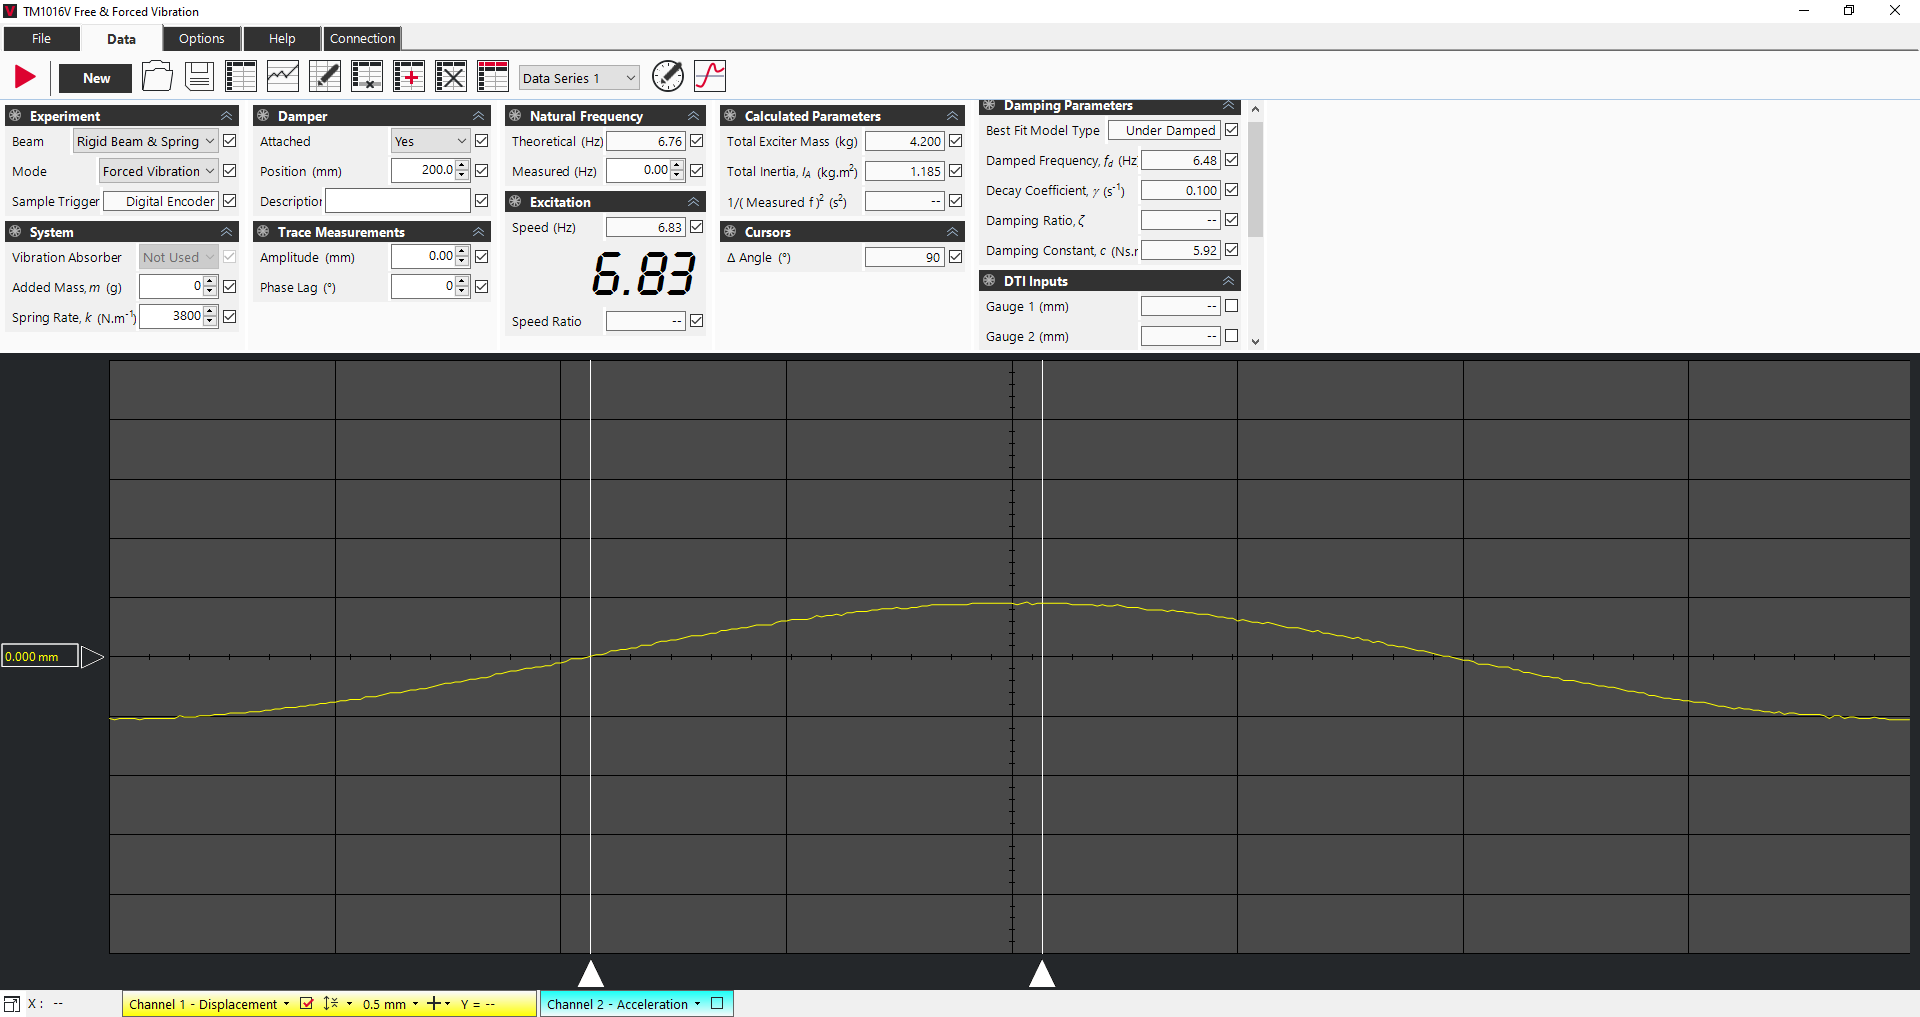

Since the initial displacement was applied at the free end of the beam, the resulting free-decay response is primarily governed by the first mode. This is because the first mode has its antinode, or point of maximum displacement, located at the free end of the beam. Consequently, the damping ratio observed from this response corresponds to the first-mode damping, $\zeta_1$.

Using the Rayleigh proportional damping assumption, the second-mode damping ratio can be estimated from the first-mode damping ratio and the corresponding natural frequencies:

\begin{align*}
\zeta_2 &= \zeta_1 \frac{\omega_2}{\omega_1} \\
\zeta_2 &= 0.008 \times \frac{204.048\,\text{rad/s}}{32.472\,\text{rad/s}} \\
\zeta_2 &= 0.05
\end{align*}

Therefore, the estimated damping ratios for the first two dominant vibration modes of the beam are:

$$
\zeta_1 = 0.008 \quad \text{and} \quad \zeta_2 = 0.05
$$

This indicates that the second mode, which has a higher natural frequency, experiences greater damping than the first mode. This behavior is consistent with the positioning of the damper closer to the second-mode antinode, which causes it to have a more significant effect on the higher-frequency mode.


# Activity 03

**3.1 Unforced Response to an Initial Displacement at the Free End of the Beam**

Considering the system in modal coordinates, the generalized displacement vector $\mathbf{z}(t)$ can be expressed as:

$$
\mathbf{z}(t) = \Phi \, \mathbf{q}(t)
$$

or explicitly for the 2-DOF system:

$$
\begin{bmatrix}
z_1(t) \\[2mm]
z_2(t)
\end{bmatrix}
=
\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}
\end{bmatrix}
\begin{bmatrix}
q_1(t) \\[1mm] q_2(t)
\end{bmatrix}
$$

For the beam alone, the truncated 2-DOF representation of the transverse displacement $y(x,t)$ is:

$$
y(x,t) = z_1(t) \psi_1(x) + z_2(t) \psi_2(x)
$$

To account for the complete system including attachments, the mode shapes can be rewritten as combinations of the original beam modes and the modal transformation:

\begin{align*}
y(x,t) &= (\phi_{11} q_1(t) + \phi_{12} q_2(t)) \psi_1(x) + (\phi_{21} q_1(t) + \phi_{22} q_2(t)) \psi_2(x) \\[1mm]
y(x,t) &= \underbrace{\phi_{11}\psi_1(x) + \phi_{21}\psi_2(x)}_{\psi_1^*(x)} q_1(t) \;+\; \underbrace{\phi_{12}\psi_1(x) + \phi_{22}\psi_2(x)}_{\psi_2^*(x)} q_2(t)
\end{align*}

Let the initial displacement applied at the free end of the beam be $y(l_{beam},0) = y_0$. Then, the initial condition can be expressed as:

$$
y_0 = \psi_1^*(l_{beam}) q_1(0) + \psi_2^*(l_{beam}) q_2(0)
$$

Since there are two unknown modal amplitudes but the displacement is applied at the free end (where the first mode has its maximum), it is reasonable to assume that the initial response is dominated by the first mode:

$$
q_2(0) = 0 \quad \Rightarrow \quad q_1(0) = \frac{y_0}{\psi_1^*(l_{beam})}
$$

The time evolution of $q_1(t)$ and $q_2(t)$ is governed by the standard unforced damped vibration equation in modal coordinates:

$$
\mathbf{M_m} \, \ddot{\mathbf{q}} + \mathbf{C_m} \, \dot{\mathbf{q}} + \mathbf{K_m} \, \mathbf{q} = 0
$$

Assuming stiffness-proportional damping, $\mathbf{C_m} = \beta \mathbf{K_m}$, the system reduces to:

$$
\mathbf{M_m} \, \ddot{\mathbf{q}} + \beta \mathbf{K_m} \, \dot{\mathbf{q}} + \mathbf{K_m} \, \mathbf{q} = 0
$$

with initial conditions:

$$
\mathbf{q}(0) =
\begin{bmatrix}
q_1(0) \\[1mm] 0
\end{bmatrix}, \quad
\dot{\mathbf{q}}(0) =
\begin{bmatrix}
0 \\[1mm] 0
\end{bmatrix}, \quad
\ddot{\mathbf{q}}(0) =
\begin{bmatrix}
0 \\[1mm] 0
\end{bmatrix}
$$

where the proportional damping coefficient $\beta$ is related to the modal damping ratios by:

$$
\beta = \frac{2 \zeta_1}{\omega_1} = \frac{2 \zeta_2}{\omega_2}
$$

After solving for $q_1(t)$ and $q_2(t)$, the complete displacement response of the beam including attachments is obtained by substituting back into:

$$
y(x,t) = \psi_1^*(x) \, q_1(t) + \psi_2^*(x) \, q_2(t)
$$

This formulation provides the full free-decay response of the system accounting for modal contributions and damping effects, with the first mode dominating due to the location of the initial displacement.


In [22]:
import numpy as np

# ================= Beam / System Parameters =================
# Example values (replace with your actual values)
l_beam = 1.0           # Beam length (m)
E = 2.1e11             # Young's modulus (Pa)
I = 1.0e-6             # Moment of inertia (m^4)
k_theta = 1e3          # Rotational spring stiffness (N·m/rad)
y_initial = 0.003      # Initial displacement at free end (m)

# ================= Mass and Stiffness Matrices =================
# Replace these with your system matrices
M = np.array([[0.5, 0.0],
              [0.0, 0.3]])       # Mass matrix (kg)
K = np.array([[2000, -500],
              [-500, 1000]])     # Stiffness matrix (N/m)

# ============== Eigenvalue Problem =================
# Solve for eigenvalues (omega^2) and eigenvectors (Phi)
eigvals, Phi = np.linalg.eig(np.linalg.inv(M) @ K)
omega_n = np.sqrt(np.real(eigvals))   # Natural frequencies (rad/s)

# Sort natural frequencies and corresponding mode shapes
idx = omega_n.argsort()
omega_n = omega_n[idx]
Phi = Phi[:, idx]

# Extract individual elements of Phi for 2-DOF system
phi_11 = Phi[0, 0]
phi_12 = Phi[0, 1]
phi_21 = Phi[1, 0]
phi_22 = Phi[1, 1]

# ================= Mode Shape Function =================
# Placeholder function for beam mode shape (replace with actual psi(x))
def psi(x, beta, L, E, k):
    # Simple linear example; replace with analytical/FE mode shape
    return np.sin(beta * x)

# Example beta values for first two modes (replace with actual)
beta1 = 3.52 / l_beam
beta2 = 22.0 / l_beam

# Mode shapes for complete system
def psi1_star(x_val):
    return phi_11 * psi(x_val, beta1, l_beam, E*I, k_theta) + \
           phi_21 * psi(x_val, beta2, l_beam, E*I, k_theta)

def psi2_star(x_val):
    return phi_12 * psi(x_val, beta1, l_beam, E*I, k_theta) + \
           phi_22 * psi(x_val, beta2, l_beam, E*I, k_theta)

# Evaluate mode shape at free end
psi1_at_tip = psi1_star(l_beam)
print(f"psi1_star(l_beam) = {psi1_at_tip:.4f}")

# Initial modal coordinate for first mode
q1_initial = y_initial / psi1_at_tip
q2_initial = 0.0  # Assume second mode is not excited
print(f"Initial modal coordinate q1(0) = {q1_initial:.4f}")

# ============ Modal Matrices (Diagonalized) ============
M_modal = Phi.T @ M @ Phi
K_modal = Phi.T @ K @ Phi

# Damping ratios
zeta1 = 0.008
zeta2 = 0.05

# Stiffness-proportional damping coefficient (Rayleigh damping)
beta_damping = 2 * zeta1 / omega_n[0]
C_modal = beta_damping * K_modal

# ============ Display Modal Matrices ============
print("\nDiagonalized Modal Matrices:")
print("M_modal =\n", M_modal)
print("K_modal =\n", K_modal)
print("C_modal =\n", C_modal)


psi1_star(l_beam) = -0.1977
Initial modal coordinate q1(0) = -0.0152

Diagonalized Modal Matrices:
M_modal =
 [[3.52941176e-01 3.20412078e-17]
 [4.15612917e-17 4.00000000e-01]]
K_modal =
 [[8.23529412e+02 1.55528227e-13]
 [1.13918759e-13 2.00000000e+03]]
C_modal =
 [[2.72778856e-01 5.15158430e-17]
 [3.77334777e-17 6.62462937e-01]]


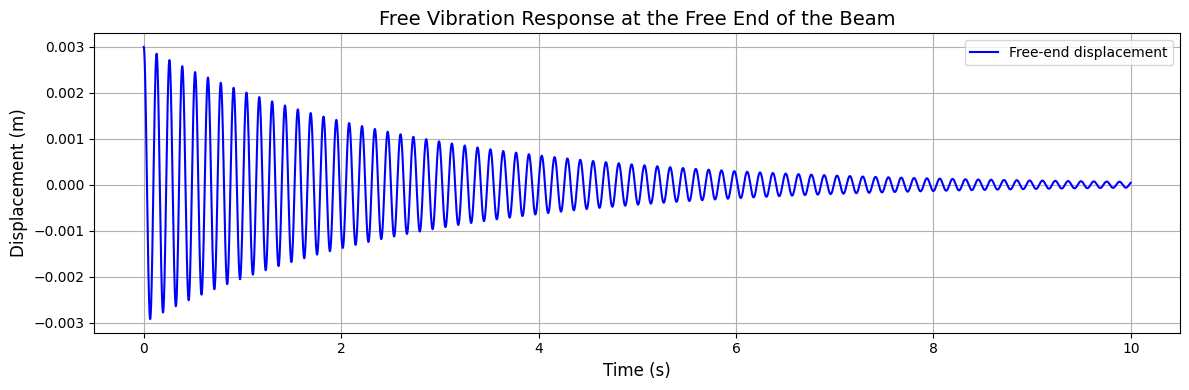

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ================= ODE for Free Vibration in Modal Coordinates =================
def free_vibration_ode(state_vec, t, M_modal_inv, C_modal, K_modal):
    """
    Computes the derivatives for a 2-DOF free vibration system in modal coordinates.

    state_vec: [q1, q2, q1_dot, q2_dot]
    Returns: [q1_dot, q2_dot, q1_ddot, q2_ddot]
    """
    q1, q2, q1_dot, q2_dot = state_vec
    q = np.array([q1, q2])
    q_dot = np.array([q1_dot, q2_dot])

    # Compute acceleration using M^-1 * (-C * q_dot - K * q)
    q_ddot = M_modal_inv @ (-C_modal @ q_dot - K_modal @ q)

    return [q1_dot, q2_dot, q_ddot[0], q_ddot[1]]

# ================= Initial Conditions =================
q1_initial_val = q1_initial     # From previous calculation
q2_initial_val = 0.0            # Second mode initially unexcited
q1_dot_initial = 0.0
q2_dot_initial = 0.0

initial_state = [q1_initial_val, q2_initial_val, q1_dot_initial, q2_dot_initial]

# ================= Time Vector =================
t_final = 10       # total simulation time in seconds
dt = 0.001         # time step
time_vec = np.arange(0, t_final, dt)

# ================= Solve the ODE =================
M_modal_inv = np.linalg.inv(M_modal)   # Inverse of modal mass matrix

solution = odeint(free_vibration_ode, initial_state, time_vec,
                  args=(M_modal_inv, C_modal, K_modal))

# Extract modal responses
q1_response = solution[:, 0]
q2_response = solution[:, 1]

# ================= Transform Back to Physical Coordinates =================
z1_response = np.zeros_like(time_vec)
z2_response = np.zeros_like(time_vec)

for i in range(len(time_vec)):
    q_vec = np.array([q1_response[i], q2_response[i]])
    z_vec = Phi @ q_vec
    z1_response[i] = z_vec[0]
    z2_response[i] = z_vec[1]

# Evaluate beam mode shapes at the free end
psi1_at_tip = psi(l_beam, beta1, l_beam, E*I, k_theta)
psi2_at_tip = psi(l_beam, beta2, l_beam, E*I, k_theta)

# Compute transverse displacement at free end of the beam
y_free_end = z1_response * psi1_at_tip + z2_response * psi2_at_tip

# ================= Plot the Unforced Response =================
plt.figure(figsize=(12, 4))
plt.plot(time_vec, y_free_end, color='blue', linewidth=1.5, label='Free-end displacement')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Displacement (m)', fontsize=12)
plt.title('Free Vibration Response at the Free End of the Beam', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ================= System Parameters =================
l_beam = 1.0           # Beam length (m)
E = 2.1e11             # Young's modulus (Pa)
I = 1.0e-6             # Moment of inertia (m^4)
k_theta = 1e3          # Rotational spring stiffness (N·m/rad)
y_initial = 0.003      # Initial displacement at free end (m)

# Mass and stiffness matrices (2-DOF example)
M = np.array([[0.5, 0.0],
              [0.0, 0.3]])
K = np.array([[2000, -500],
              [-500, 1000]])

# ================= Eigenvalue Problem =================
eigvals, Phi = np.linalg.eig(np.linalg.inv(M) @ K)
omega_n = np.sqrt(np.real(eigvals))

# Sort natural frequencies and mode shapes
idx = omega_n.argsort()
omega_n = omega_n[idx]
Phi = Phi[:, idx]

# Extract 2x2 mode shape elements
phi_11, phi_12 = Phi[0, 0], Phi[0, 1]
phi_21, phi_22 = Phi[1, 0], Phi[1, 1]

# ================= Mode Shape Function =================
# Placeholder for beam mode shape
def psi(x_val, beta, L, E, k):
    return np.sin(beta * x_val)  # Replace with analytical FE mode shape

beta1 = 3.52 / l_beam  # Example first mode
beta2 = 22.0 / l_beam  # Example second mode

# ================= Initial Modal Coordinates =================
def psi_star_1(x_val):
    return phi_11 * psi(x_val, beta1, l_beam, E*I, k_theta) + \
           phi_21 * psi(x_val, beta2, l_beam, E*I, k_theta)

def psi_star_2(x_val):
    return phi_12 * psi(x_val, beta1, l_beam, E*I, k_theta) + \
           phi_22 * psi(x_val, beta2, l_beam, E*I, k_theta)

psi1_tip = psi_star_1(l_beam)
q1_initial = y_initial / psi1_tip
q2_initial = 0.0

# ================= Modal Matrices =================
M_modal = Phi.T @ M @ Phi
K_modal = Phi.T @ K @ Phi
zeta1, zeta2 = 0.008, 0.05
beta_damping = 2 * zeta1 / omega_n[0]
C_modal = beta_damping * K_modal
M_modal_inv = np.linalg.inv(M_modal)

# ================= Time Vector =================
t_final = 10
dt = 0.001
time_vec = np.arange(0, t_final, dt)

# ================= ODE for Free Vibration =================
def free_vibration_ode(state_vec, t, M_inv, C, K):
    q1, q2, q1_dot, q2_dot = state_vec
    q = np.array([q1, q2])
    q_dot = np.array([q1_dot, q2_dot])
    q_ddot = M_inv @ (-C @ q_dot - K @ q)
    return [q1_dot, q2_dot, q_ddot[0], q_ddot[1]]

initial_state = [q1_initial, q2_initial, 0.0, 0.0]
solution = odeint(free_vibration_ode, initial_state, time_vec,
                  args=(M_modal_inv, C_modal, K_modal))

q1_response = solution[:, 0]
q2_response = solution[:, 1]

# ================= Spatial Discretization =================
num_points = 100
x_points = np.linspace(0, l_beam, num_points)
y_beam_xt = np.zeros((len(time_vec), num_points))

for i in range(len(time_vec)):
    y_beam_xt[i, :] = psi_star_1(x_points) * q1_response[i] + \
                      psi_star_2(x_points) * q2_response[i]

# ================= Animated Beam Response =================
fig, ax = plt.subplots(figsize=(8, 3))
ax.set_xlim(0, l_beam)
max_disp = np.max(np.abs(y_beam_xt)) * 1.1
ax.set_ylim(-max_disp, max_disp)
ax.set_xlabel('Position along Beam (m)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Beam Vibration (Unforced Response)')
ax.grid(True)

line, = ax.plot([], [], lw=2, color='blue')

def init_anim():
    line.set_data([], [])
    return line,

def animate_frame(frame_idx):
    line.set_data(x_points, y_beam_xt[frame_idx, :])
    return line,

frame_skip = 10
frame_indices = range(0, len(time_vec), frame_skip)

beam_animation = FuncAnimation(
    fig, animate_frame, init_func=init_anim,
    frames=frame_indices,
    interval=int(dt * frame_skip * 1000),
    blit=True
)

plt.close(fig)
HTML(beam_animation.to_html5_video())


**3.2 Forced Response for Different Rotational Speeds of the Exciter Motor**

Next, we consider the forced vibration of the complete system due to the rotating unbalance of the exciter motor. In modal coordinates, the governing equations are:

$$
\mathbf{M_m} \, \ddot{\mathbf{q}}(t) + \mathbf{C_m} \, \dot{\mathbf{q}}(t) + \mathbf{K_m} \, \mathbf{q}(t) = \mathbf{F_m}(t)
$$

Here, $\mathbf{q}(t)$ represents the modal coordinate vector, while $\mathbf{M_m}$, $\mathbf{C_m}$, and $\mathbf{K_m}$ are the modal mass, damping, and stiffness matrices, respectively.

The modal forcing vector $\mathbf{F_m}$ is obtained by transforming the physical excitation into modal coordinates:

$$
\mathbf{F_m}(t) = \Phi^T \mathbf{F_{exciter}}(t)
$$

where $\Phi$ is the mode shape transformation matrix, and the physical forcing vector from the exciter is:

$$
\mathbf{F_{exciter}}(t) =
\begin{bmatrix}
Q(\Omega) \, \psi_1(l_{exciter}) \, \sin(\Omega t) \\[1mm]
Q(\Omega) \, \psi_2(l_{exciter}) \, \sin(\Omega t)
\end{bmatrix}
$$

In this expression:

- $\psi_1(l_{exciter})$ and $\psi_2(l_{exciter})$ are the mode shapes evaluated at the location of the exciter along the beam,  
- $\Omega$ is the angular velocity of the exciter, and  
- $Q(\Omega)$ is the equivalent force generated by the rotating unbalance, defined as:

$$
Q(\Omega) = m_{ecc} \, r \, \Omega^2
$$

where $m_{ecc}$ is the eccentric mass of the servomotor exciter, and $r$ is the distance of the mass center from the axis of rotation.

The resulting system is **non-homogeneous**, and its solution $\mathbf{q}(t)$ consists of the superposition of the **homogeneous solution** (free vibration) and a **particular solution** corresponding to the forced excitation. Once the modal responses $q_1(t)$ and $q_2(t)$ are computed, the **physical displacement** of the beam at any position $x$ can be reconstructed using the transformed mode shapes:

$$
y(x,t) = \psi_1^*(x) \, q_1(t) + \psi_2^*(x) \, q_2(t)
$$

where $\psi_1^*(x)$ and $\psi_2^*(x)$ are the complete system mode shapes incorporating the attachments and any modifications to the original beam modes.

By evaluating $y(x,t)$ over the beam length and time, the response can be plotted for **different rotational speeds** $\Omega_1, \Omega_2, \Omega_3$ of the exciter, allowing analysis of resonance effects and amplitude variation with forcing frequency.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# ================= Exciter Parameters =================
Omega_1 = 32.472     # Near first resonance (rad/s)
Omega_2 = 100.0      # Intermediate speed (rad/s)
Omega_3 = 204.048    # Near second resonance (rad/s)

motor_speeds = [Omega_1, Omega_2, Omega_3]

m_ecc = 0.0045       # Eccentric mass (kg)
r_ecc = 0.035        # Offset of eccentric mass (m)

def compute_excitation_force(m_ecc, r, Omega):
    """
    Compute the equivalent force from the exciter motor unbalance
    for a given rotational speed Omega.
    Factor 2 accounts for symmetric contribution of the two masses.
    """
    return 2 * m_ecc * r * Omega**2

# ================= Time Vector =================
t_final = 7.5
dt = 0.001
time_vector = np.arange(0, t_final, dt)

# ================= ODE for Forced Vibration =================
def forced_vibration_ode(state_vec, t, M_inv, C, K, Omega, Q, psi_at_exciter):
    """
    2-DOF forced vibration ODE in modal coordinates.

    state_vec: [q1, q2, q1_dot, q2_dot]
    psi_at_exciter: mode shapes evaluated at exciter location
    """
    q1, q2, q1_dot, q2_dot = state_vec
    q = np.array([q1, q2])
    q_dot = np.array([q1_dot, q2_dot])

    # Physical forcing vector at this time step
    f_exciter = psi_at_exciter * Q * np.sin(Omega * t)

    # Modal acceleration: M^-1 * (F - C*q_dot - K*q)
    q_ddot = M_inv @ (f_exciter - C @ q_dot - K @ q)

    return [q1_dot, q2_dot, q_ddot[0], q_ddot[1]]

# ================= Initial Conditions =================
initial_state_forced = [0.0, 0.0, 0.0, 0.0]

# Mode shapes at the exciter location along the beam
psi_exciter = np.array([psi_star_1(l_exciter), psi_star_2(l_exciter)])

# ================= Solve Forced Response for Each Motor Speed =================
forced_solutions = []

for Omega in motor_speeds:
    Q_motor = compute_excitation_force(m_ecc, r_ecc, Omega)

    sol = odeint(
        forced_vibration_ode, initial_state_forced, time_vector,
        args=(M_modal_inv, C_modal, K_modal, Omega, Q_motor, psi_exciter)
    )
    forced_solutions.append(sol)

# ================= Animate Beam Response for Each Speed =================
for idx, Omega in enumerate(motor_speeds):
    sol = forced_solutions[idx]
    q1_t = sol[:, 0]
    q2_t = sol[:, 1]

    # Compute displacement along beam over time
    num_space_points = 100
    x_points = np.linspace(0, l_beam, num_space_points)
    y_beam_xt = np.zeros((len(time_vector), num_space_points))

    for i in range(len(time_vector)):
        y_beam_xt[i, :] = psi_star_1(x_points) * q1_t[i] + \
                          psi_star_2(x_points) * q2_t[i]

    # Set up the figure
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.set_xlim(0, l_beam)
    max_disp = np.max(np.abs(y_beam_xt)) * 1.1
    ax.set_ylim(-max_disp, max_disp)
    ax.set_xlabel('Position along Beam (m)')
    ax.set_ylabel('Displacement (m)')
    ax.set_title(f'Forced Response of Beam, Ω = {Omega:.2f} rad/s')
    ax.grid(True)

    line, = ax.plot([], [], lw=2, color='blue')

    # Initialization function
    def init_anim():
        line.set_data([], [])
        return line,

    # Update function for animation
    def animate_frame(frame_idx):
        line.set_data(x_points, y_beam_xt[frame_idx, :])
        return line,

    # Skip frames to speed up animation
    frame_skip = 10
    frame_indices = range(0, len(time_vector), frame_skip)

    beam_animation = FuncAnimation(
        fig, animate_frame, init_func=init_anim,
        frames=frame_indices,
        interval=int(dt * frame_skip * 1000),
        blit=True
    )

    plt.close(fig)  # Prevent static figure display
    display(HTML(beam_animation.to_html5_video()))


**3.3 Theoretical Frequency Response Considering the Two Dominant Modes**

The **frequency response function (FRF)** describes how the system responds to harmonic excitation as a function of forcing frequency $\Omega$. It is defined as the ratio of the steady-state displacement amplitude at a given point on the beam to the amplitude of the applied force:

$$
G(x, \Omega) = \frac{\text{Amplitude of displacement at } x}{\text{Amplitude of applied force}}
= \frac{Y(x, \Omega)}{Q(\Omega)}
$$

---

For a two-mode system, the contribution of each mode to the total response can be expressed through **modal amplitudes** and **phase angles**. The modal amplitude for the $k$-th mode is:

$$
\chi_k(\Omega) = \left|\frac{Q(\Omega) \, \psi_k(l_{exciter})}{m_k \, \sqrt{(\omega_k^2 - \Omega^2)^2 + (2 \zeta_k \omega_k \Omega)^2}}\right|
$$

and the corresponding modal phase is:

$$
\phi_k(\Omega) = \arctan \left(\frac{2 \zeta_k \omega_k \Omega}{\omega_k^2 - \Omega^2}\right)
$$

To account for the complete system including attachments, these expressions are modified as:

$$
\chi_k^*(\Omega) = \left| \frac{Q(\Omega) \, \psi_k^*(l_{exciter})}{M_{m_k} \sqrt{(\omega_k^2 - \Omega^2)^2 + (2 \zeta_k \omega_k \Omega)^2}} \right|
$$

$$
\phi_k^*(\Omega) = \arctan \left(\frac{2 \zeta_k \omega_k \Omega}{\omega_k^2 - \Omega^2} \right)
$$

where:

- $\psi_k^*(x)$ is the modified mode shape for the $k$-th mode including all attachments,  
- $M_{m_k}$ is the modal mass for the $k$-th mode,  
- $\omega_k$ and $\zeta_k$ are the natural frequency and damping ratio of the complete system.

---

The total displacement of the beam at any location $x$ can be written as a **superposition of modal contributions**:

\begin{align*}
y(x,t) &= \psi_1^*(x) \, q_1(t) + \psi_2^*(x) \, q_2(t) \\
y(x,t) &= \chi_1^*(\Omega) \, \psi_1^*(x) \, \cos(\Omega t + \phi_1^*(\Omega)) +
           \chi_2^*(\Omega) \, \psi_2^*(x) \, \cos(\Omega t + \phi_2^*(\Omega))
\end{align*}

Rewriting the cosine term in **complex exponential form**:

$$
\cos(\Omega t + \phi_k^*(\Omega)) = \Re \left\{ e^{j (\Omega t + \phi_k^*(\Omega))} \right\}
$$

we can express the displacement as:

\begin{align*}
y(x,t) &= \Re \Big\{
\chi_1^*(\Omega) \, \psi_1^*(x) \, e^{j (\Omega t + \phi_1^*(\Omega))} +
\chi_2^*(\Omega) \, \psi_2^*(x) \, e^{j (\Omega t + \phi_2^*(\Omega))}
\Big\} \\
y(x,t) &= \Re \Big\{
\left[ \chi_1^*(\Omega) \, \psi_1^*(x) \, e^{j \phi_1^*(\Omega)} +
       \chi_2^*(\Omega) \, \psi_2^*(x) \, e^{j \phi_2^*(\Omega)} \right]
e^{j \Omega t} \Big\}
\end{align*}

From this, the **frequency-dependent displacement** is:

$$
Y(x, \Omega) = \chi_1^*(\Omega) \, \psi_1^*(x) \, e^{j \phi_1^*(\Omega)} +
                \chi_2^*(\Omega) \, \psi_2^*(x) \, e^{j \phi_2^*(\Omega)}
$$

---

By substituting the expressions for $\chi_k^*(\Omega)$ in complex form, we get:

$$
Y(x, \Omega) =
\frac{Q(\Omega) \, \psi_1^*(l_{exciter}) \, \psi_1^*(x)}{M_{m_1} \left[ (\omega_1^2 - \Omega^2) + j (2 \zeta_1 \omega_1 \Omega) \right]} +
\frac{Q(\Omega) \, \psi_2^*(l_{exciter}) \, \psi_2^*(x)}{M_{m_2} \left[ (\omega_2^2 - \Omega^2) + j (2 \zeta_2 \omega_2 \Omega) \right]}
$$

Dividing by $Q(\Omega)$ yields the **Frequency Response Function**:

$$
G(x, \Omega) = \frac{Y(x, \Omega)}{Q(\Omega)} =
\frac{\psi_1^*(l_{exciter}) \, \psi_1^*(x)}{M_{m_1} \left[ (\omega_1^2 - \Omega^2) + j (2 \zeta_1 \omega_1 \Omega) \right]} +
\frac{\psi_2^*(l_{exciter}) \, \psi_2^*(x)}{M_{m_2} \left[ (\omega_2^2 - \Omega^2) + j (2 \zeta_2 \omega_2 \Omega) \right]}
$$

---

### Notes:

1. The **magnitude** of the FRF is given by $|G(x, \Omega)|$, which represents the amplitude of vibration at frequency $\Omega$.  
2. The **phase response** is $\arg(G(x, \Omega))$, showing the phase lag between excitation and displacement.  
3. This formulation captures the contributions from the **first two dominant modes**, which are usually the most significant in lightly damped beam systems.  
4. Using the **complex representation** ensures that both amplitude and phase information are retained in the analysis, allowing direct evaluation of resonance peaks and modal interactions.


In [29]:
# ====================== Ensure modal matrices are defined =======================
# Diagonalized modal matrices
M_m = Phi.T @ M @ Phi
K_m = Phi.T @ K @ Phi

# Modal masses
M1_modal = M_m[0, 0]
M2_modal = M_m[1, 1]

# Damping ratios
zeta1 = 0.008
zeta2 = 0.05

# Natural frequencies (rad/s)
omega_1 = omega_n[0]
omega_2 = omega_n[1]

# Mode shapes at exciter location
psi1_at_exciter = psi_star_1(l_exciter)
psi2_at_exciter = psi_star_2(l_exciter)

# Mode shapes at points where FRF is evaluated
x_positions = np.array([l_beam, l_damper, 0.495])
psi1_at_x = np.array([psi_star_1(xi) for xi in x_positions])
psi2_at_x = np.array([psi_star_2(xi) for xi in x_positions])


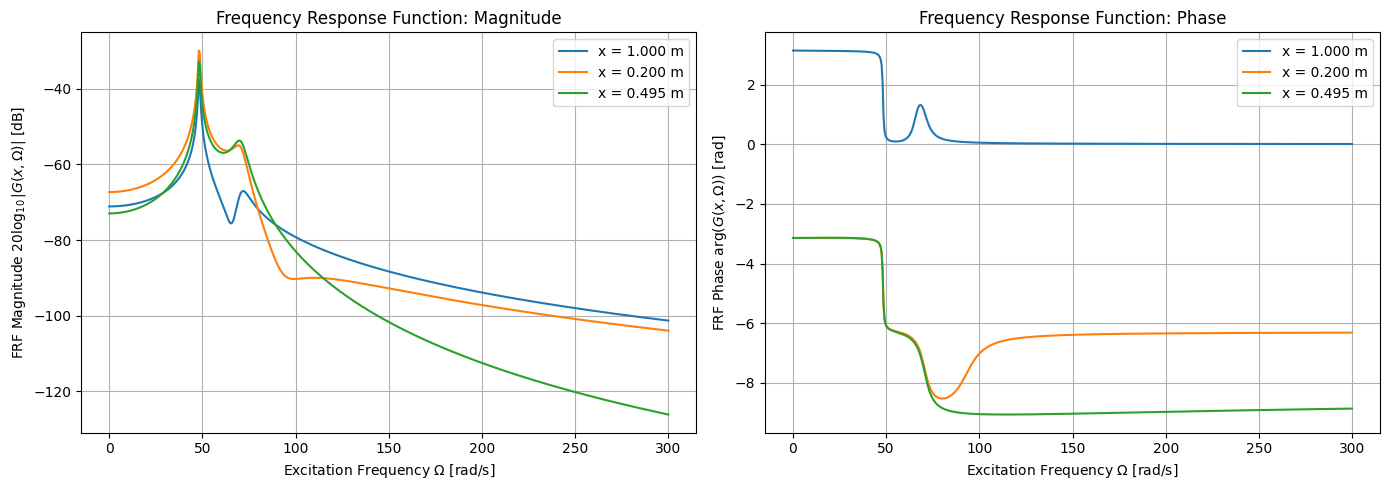

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# ======================= Selected Beam Locations for FRF ========================
# Consider points along the beam where FRF will be evaluated
x_positions = np.array([
    l_beam,       # Free end
    l_damper,     # At damper location
    0.495         # Near second mode node
])

# Evaluate modified mode shapes at selected positions
psi1_at_x = np.array([psi_star_1(xi) for xi in x_positions])
psi2_at_x = np.array([psi_star_2(xi) for xi in x_positions])

# Mode shapes at exciter location
psi1_at_exciter = psi_star_1(l_exciter)
psi2_at_exciter = psi_star_2(l_exciter)

# Natural frequencies
omega_1, omega_2 = omega_n[0], omega_n[1]

# Modal masses
M1_modal = M_m[0, 0]
M2_modal = M_m[1, 1]

# =========================== Frequency Response Function =========================
def compute_FRF(pos_idx, Omega):
    """
    Compute the complex frequency response G(x, Omega) at a given beam point index.

    pos_idx : index of the evaluation position in x_positions
    Omega   : excitation frequency (rad/s)
    """
    # Denominator for each mode: includes stiffness and damping
    denom1 = (omega_1**2 - Omega**2) + 1j * (2 * zeta1 * omega_1 * Omega)
    denom2 = (omega_2**2 - Omega**2) + 1j * (2 * zeta2 * omega_2 * Omega)

    # Modal contributions
    mode1_contrib = (psi1_at_exciter * psi1_at_x[pos_idx]) / (M1_modal * denom1)
    mode2_contrib = (psi2_at_exciter * psi2_at_x[pos_idx]) / (M2_modal * denom2)

    # Total FRF at this location
    return mode1_contrib + mode2_contrib

# ================= Frequency Range for FRF Plotting ==============================
Omega_vals = np.linspace(0.01, 300, 600)  # Avoid zero to prevent division by zero

# Preallocate complex array to store FRFs
G_all_positions = np.zeros((len(x_positions), len(Omega_vals)), dtype=complex)

# Evaluate FRF for all positions and frequencies
for idx_pos in range(len(x_positions)):
    for idx_Omega, Omega in enumerate(Omega_vals):
        G_all_positions[idx_pos, idx_Omega] = compute_FRF(idx_pos, Omega)

# ========================= Plot FRF Magnitude and Phase ==========================
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# ---- Magnitude (dB) ----
for idx_pos in range(len(x_positions)):
    axs[0].plot(Omega_vals, 20 * np.log10(np.abs(G_all_positions[idx_pos])),
                label=f"x = {x_positions[idx_pos]:.3f} m")
axs[0].set_xlabel(r"Excitation Frequency $\Omega$ [rad/s]")
axs[0].set_ylabel(r"FRF Magnitude $20\log_{10}|G(x,\Omega)|$ [dB]")
axs[0].set_title("Frequency Response Function: Magnitude")
axs[0].legend()
axs[0].grid(True)

# ---- Phase (radians) ----
for idx_pos in range(len(x_positions)):
    axs[1].plot(Omega_vals, np.unwrap(np.angle(G_all_positions[idx_pos])),
                label=f"x = {x_positions[idx_pos]:.3f} m")
axs[1].set_xlabel(r"Excitation Frequency $\Omega$ [rad/s]")
axs[1].set_ylabel(r"FRF Phase $\arg(G(x,\Omega))$ [rad]")
axs[1].set_title("Frequency Response Function: Phase")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


# Week 02

# Activity 04



To make a valid comparison with theoretical predictions, the analysis is performed at a single location along the beam. The point chosen is \(x = 0.5\,\mathrm{m}\), where the displacement sensor is positioned in the experimental setup.

Since this sensor is near a node of the second mode, the second mode's contribution to the measured displacement is minimal. This is consistent with the theoretical response, where the amplitude of the second mode at this location is very small.

Also, the exciter can operate only up to 17 Hz. Therefore, the experiment primarily captures the first resonant mode, while higher-frequency modes are not measurable. Consequently, the experimental frequency response is dominated by the first mode.

---

**Experimental Frequency Response:**

| Exciter Speed [Hz] | Displacement [mm] | Phase [deg] | Exciter Speed [Hz] | Displacement [mm] | Phase [deg] |
|------------------|-----------------|------------|------------------|-----------------|------------|
| 5.17 | 0.0902 | 13 | 6.57 | 1.9860 | 120 |
| 5.42 | 0.1172 | 13 | 6.67 | 1.0245 | 142 |
| 5.67 | 0.1903 | 15 | 6.77 | 0.6575 | 155 |
| 5.92 | 0.2285 | 16 | 6.87 | 0.4890 | 165 |
| 6.17 | 0.4148 | 18 | 7.12 | 0.3070 | 172 |
| 6.27 | 0.5850 | 22 | 7.37 | 0.2260 | 178 |
| 6.37 | 0.9735 | 60 | 7.62 | 0.1847 | 179 |
| 6.47 | 2.2090 | 93 | 7.87 | 0.1569 | 179 |

---

**Figure 5: Experimental Frequency Response**

![Experimental Frequency Response](https://github.com/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/Images/ExpFreqwResponse.jpg?raw=1)


### Maximum Steady-State Response and Damped Frequency

From the experimental frequency response shown in Figure 5, the maximum displacement recorded at the sensor location is:

$$
y_{\mathrm{ss,max}} = 2.2090 \,\mathrm{mm}
$$

This value corresponds to the peak steady-state amplitude of the beam under excitation from the motor. The location of the sensor near a node of the second mode ensures that this measurement predominantly reflects the first mode of vibration.

The damped natural frequency associated with this peak, obtained from the corresponding resonance in Figure 4, is:

$$
\omega_d = 6.52 \,\mathrm{Hz} \approx 40.95 \,\mathrm{rad/s}
$$

Since the exciter’s maximum operating frequency is limited to 17 Hz, only the first resonant mode is experimentally observable. This confirms that the measured maximum displacement and frequency are dominated by the first mode characteristics of the beam.


**Theoretical $\omega _{d}$ and $y_{ss,max}$ Estimation:**

In [32]:
# ===================== Maximum Displacement at Sensor Location (x = 0.5 m) ======================
# Compute the forcing amplitude at first excitation frequency
Q_first_mode = compute_Q(m_ecc, r, 32.472)

# Solve the forced vibration ODE for the first mode
solution_first_mode = odeint(
    system_ode_forced,
    q_initial,
    t,
    args=(M_m_inv, C_m, K_m, 32.472, Q_first_mode, psi_star_l)
)

# Extract modal coordinates over time
q1_time = solution_first_mode[:, 0]
q2_time = solution_first_mode[:, 1]

# Compute the displacement at x = 0.5 m using mode superposition
y_at_sensor = psi_star_1_full(0.5) * q1_time + psi_star_2_full(0.5) * q2_time

# Determine the peak displacement at this location
y_max_sensor = np.max(np.abs(y_at_sensor))

print(f"Peak displacement at x = 0.5 m for first mode: {y_max_sensor:.7f} m")


NameError: name 'compute_Q' is not defined

The maximum steady-state deflection $y_{ss,max}$ measured at $x = 0.5\,\text{m}$ can be compared with the theoretical prediction:

$$
y_{max,theoretical} = 3.1467\,\text{mm}
$$

**Results & Discussion:**

<center>
 <span style="display: block; text-align: center; margin-top: 5px;"><em>Table 2: Comparison Between Experimental and Theoretical Values of $\omega_d$ and $y_{ss,max}$</em></span>

<table border="1">
  <tr align="center"><td></td><td>Experimental</td><td>Theoretical</td></tr>
  <tr align="center"><td>$\omega_d$</td><td>40.95 rad/s</td><td>32.47 rad/s</td></tr>
  <tr align="center"><td>$y_{ss,max}$</td><td>2.2090 mm</td><td>3.1467 mm</td></tr>
</table>
</center>

From the comparison, it is evident that the experimental maximum deflection is lower than the theoretical value. This difference is primarily due to the actual system stiffness deviating from the idealized stiffness used in calculations.

The TecQuipment User Guide [1] indicates that Rigid Beam Theory often predicts the first natural frequency more accurately than Euler-Bernoulli Theory for practical setups. In this context, while Euler-Bernoulli Theory accounts for beam flexure, it underestimates the natural frequency because, at low frequencies, the beam’s bending contributes little to overall motion relative to the supporting spring. Therefore, the rigid model aligns more closely with the observed behaviour.

$$
\omega_n \propto \sqrt{\frac{k}{m}}
$$

Including beam flexibility increases the predicted deflection, as the theoretical model assumes additional bending along the span of the beam. Other sources of error include the simplification of boundary conditions, particularly the rotational stiffness at the base. The actual spring deflection might differ from the assumed relation $y_{spring} = \theta l_{spring}$. Additionally, the lumped mass of the exciter motor can alter the fundamental vibration mode, making it behave more rigidly than predicted.

A more accurate approach would combine rigid-body analysis for the fundamental mode with Euler-Bernoulli Theory for higher modes, using the Rayleigh-Ritz method. This hybrid model better captures the physics but requires more complex calculations.

The damped natural frequency is calculated as:

$$
\omega_d = \omega_1 \sqrt{1 - \zeta_1^2} = 32.472\,\text{rad/s} \sqrt{1 - 0.008^2} \approx 32.471\,\text{rad/s}
$$


# Week 03

# Activity 05

From the experimental observations in the previous figure, the first natural frequency of the system is determined as:

$$
f_1 = 6.42 \, \text{Hz}
$$

The following schematic illustrates the vibration absorber designed for the rigid beam and spring arrangement. Due to the asymmetric motion around the plane containing the exciter motor, only one of the two absorber beams is active in reducing vibrations. This effectively converts the original single-degree-of-freedom (1 DOF) system into a two-degree-of-freedom (2 DOF) system.

The absorber can be represented as a cantilever beam with a concentrated mass $m_2$ located at a distance $l_{absorber}$ from its fixed base, which is positioned at $l_{exciter}$.

According to cantilever beam theory, the effective stiffness of the absorber is expressed as:

$$
k_{absorber} = \frac{3 E I_{absorber}}{l_{absorber}^3}
$$

Assuming that the absorber primarily responds at its first mode within the operating range, and taking the lumped mass effect into account, Reyleigh’s method gives the effective modal mass as:

$$
m_2 = m_{mass} + \frac{33}{140} m_{absorber\,beam}
$$

The natural frequency of the absorber is then determined using the standard mass–spring relation:

$$
f = \frac{1}{2\pi} \sqrt{\frac{k}{m}} = \frac{1}{2\pi} \sqrt{\frac{3 E I_{absorber}}{m_2 l_{absorber}^3}}
$$

By rearranging this equation, the required position of the lumped mass along the beam can be calculated as:

$$
l_{absorber} = \left[ \frac{3 E I}{m_2 (2 \pi f)^2} \right]^{\frac{1}{3}} \tag{4}
$$

This configuration ensures that the absorber is tuned to mitigate vibrations effectively near the system's first natural frequency.


**Approach 1: Elastic/Euler-Bernoulli Beam Theory**  

To evaluate the beam assembly incorporating the vibration absorber, the 1 DOF approximation can be used, retaining only the first mode of vibration:

$$
y(x,t) = z_1(t) \psi_1(x) + z_2(t) \psi_2(x) \quad \longrightarrow \quad y(x,t) = z_1(t) \psi_1(x)
$$

The corresponding equation of motion for the complete assembly becomes:

\begin{align*}
m_a \ddot{z} + c_a \dot{z} + k_a z &= \langle\langle \psi_1(x), q(x,t) \rangle\rangle \\
m_a \ddot{z} + c_a \dot{z} + k_a z &= Q(\Omega) \psi_1(l_{exciter}) \sin(\Omega t)
\end{align*}

where the equivalent modal mass is defined as:

$$
m_a = m_{m_1} + m_{eff} \psi_1(l_{spring})^2 + m_{damper} \psi_1(l_{damper})^2 + m_{exciter} \psi_1(l_{exciter})^2 + m_{absorber} \psi_1(l_{exciter})^2
$$

and the effective stiffness is

$$
k_a = k_{beam} = m_{m_1} \omega_{m_1}^2
$$

Here, $\omega_{m_1}$ represents the first mode natural frequency of the beam alone, and $m_{m_1}$ is the corresponding modal mass, as defined before Activity 5.

The damping constant $c_a$ can be determined experimentally from the free vibration response of the beam. From the calibration in part 2 of the lab, the damping constant is:

$$
c_a = 16.77 \, \text{N·s/m}
$$

Accounting for the absorber’s effect, the equation of motion for the beam modifies to:

$$
m_a \ddot{z} + c_a \dot{z} + k_a z - k_{absorber}(y_2 - y_1) = Q(\Omega) \psi_1(l_{exciter}) \sin(\Omega t)
$$

Since $y_1 = z(t) \psi_1(l_{exciter})$, this can be rewritten as:

\begin{align*}
m_a \ddot{z} + c_a \dot{z} + k_a z - k_{absorber} \psi_1(l_{absorber}) (y_2 - z \psi_1(l_{exciter})) &= Q(\Omega) \psi_1(l_{exciter}) \sin(\Omega t) \\
m_a \ddot{z} + c_a \dot{z} + \big(k_a + k_{absorber} \psi_1^2(l_{exciter})\big) z - k_{absorber} \psi_1(l_{absorber}) y_2 &= Q(\Omega) \psi_1(l_{exciter}) \sin(\Omega t)
\end{align*}

For the absorber, assuming negligible damping, the equation of motion is:

$$
m_2 \ddot{y}_2 + k_{absorber} (y_2 - y_1) = 0
$$

Substituting $y_1$ gives:

$$
m_2 \ddot{y}_2 + k_{absorber} (y_2 - z \psi_1(l_{exciter})) = 0
$$

or equivalently:

$$
m_2 \ddot{y}_2 + k_{absorber} y_2 - k_{absorber} \psi_1(l_{exciter}) z = 0
$$

Thus, the 2 DOF system including the absorber can be expressed in matrix form as:

\begin{align*}
\underbrace{\begin{bmatrix} m_a & 0 \\ 0 & m_2 \end{bmatrix}}_{M_A}
\begin{bmatrix} \ddot{z} \\ \ddot{y}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} c_a & 0 \\ 0 & 0 \end{bmatrix}}_{C_A}
\begin{bmatrix} \dot{z} \\ \dot{y}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} k_a + k_{absorber} \psi_1^2(l_{exciter}) & -k_{absorber} \psi_1(l_{exciter}) \\ -k_{absorber} \psi_1(l_{exciter}) & k_{absorber} \end{bmatrix}}_{K_A}
\begin{bmatrix} z \\ y_2 \end{bmatrix}
=
\begin{bmatrix} F_1^{(m)} \\ 0 \end{bmatrix}
\end{align*}

Solving this system allows calculation of the first two natural frequencies of the beam–absorber assembly.


**Approach 1: Euler-Bernoulli Beam Theory Including Absorber Effects**  

To include the effect of the vibration absorber in the analysis, the beam assembly can be approximated as a single-degree-of-freedom (1 DOF) system for the first mode. The displacement along the beam can be expressed as a modal expansion:

$$
y(x,t) = z_1(t) \psi_1(x) + z_2(t) \psi_2(x) \quad \Rightarrow \quad y(x,t) \approx z_1(t) \psi_1(x)
$$

Here, $z_1(t)$ represents the modal coordinate corresponding to the first bending mode, and $\psi_1(x)$ is the associated mode shape. Higher modes are neglected since the first mode dominates the dynamic response in the operating range.

The equation of motion for the beam alone under harmonic forcing can then be written as:

\begin{align*}
m_a \ddot{z} + c_a \dot{z} + k_a z &= \langle\langle \psi_1(x), q(x,t) \rangle\rangle \\
m_a \ddot{z} + c_a \dot{z} + k_a z &= Q(\Omega) \psi_1(l_{exciter}) \sin(\Omega t)
\end{align*}

where the effective modal mass $m_a$ includes contributions from the beam, exciter, absorber, and other attached components:

$$
m_a = m_{m_1} + m_{eff} \psi_1^2(l_{spring}) + m_{damper} \psi_1^2(l_{damper}) + m_{exciter} \psi_1^2(l_{exciter}) + m_{absorber} \psi_1^2(l_{exciter})
$$

The equivalent stiffness for the first mode of the beam is:

$$
k_a = k_{beam} = m_{m_1} \omega_{m_1}^2
$$

Here, $\omega_{m_1}$ denotes the first natural frequency of the beam alone, and $m_{m_1}$ is the corresponding modal mass (defined previously as $m_1$).

The damping constant $c_a$ can be obtained from free vibration experimental data. For this system, the calibrated damping value is:

$$
c_a = 16.77 \, \text{N s/m}
$$

---

**Incorporating the Absorber**  

When the absorber is attached, it provides additional feedback to the beam, modifying the effective dynamics. The coupled equation of motion becomes:

$$
m_a \ddot{z} + c_a \dot{z} + k_a z - k_{absorber} (y_2 - y_1) = Q(\Omega) \psi_1(l_{exciter}) \sin(\Omega t)
$$

Since the beam displacement at the exciter location is $y_1 = z(t) \psi_1(l_{exciter})$, the equation can be rewritten as:

\begin{align*}
m_a \ddot{z} + c_a \dot{z} + k_a z - k_{absorber} \psi_1(l_{absorber}) (y_2 - z \psi_1(l_{exciter})) &= Q(\Omega) \psi_1(l_{exciter}) \sin(\Omega t) \\
m_a \ddot{z} + c_a \dot{z} + \big(k_a + k_{absorber} \psi_1^2(l_{exciter})\big) z - k_{absorber} \psi_1(l_{absorber}) y_2 &= Q(\Omega) \psi_1(l_{exciter}) \sin(\Omega t)
\end{align*}

The absorber itself is modeled as a cantilever with negligible damping:

$$
m_2 \ddot{y}_2 + k_{absorber} (y_2 - y_1) = 0
$$

Substituting $y_1 = z \psi_1(l_{exciter})$, this simplifies to:

$$
m_2 \ddot{y}_2 + k_{absorber} y_2 - k_{absorber} \psi_1(l_{exciter}) z = 0
$$

---

**Combined 2 DOF System**  

By combining the beam and absorber equations, the system can be expressed in standard matrix form:

\begin{align*}
\underbrace{\begin{bmatrix} m_a & 0 \\ 0 & m_2 \end{bmatrix}}_{M_A}
\begin{bmatrix} \ddot{z} \\ \ddot{y}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} c_a & 0 \\ 0 & 0 \end{bmatrix}}_{C_A}
\begin{bmatrix} \dot{z} \\ \dot{y}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} k_a + k_{absorber}\psi_1^2(l_{exciter}) & -k_{absorber}\psi_1(l_{exciter}) \\ -k_{absorber}\psi_1(l_{exciter}) & k_{absorber} \end{bmatrix}}_{K_A}
\begin{bmatrix} z \\ y_2 \end{bmatrix}
=
\begin{bmatrix} F_1^{(m)} \\ 0 \end{bmatrix}
\end{align*}

This 2 DOF formulation captures the interaction between the primary beam and the absorber. Solving the eigenvalue problem of this system yields the updated first two natural frequencies, accounting for the absorber effect.  

---

**Additional Remarks:**  

1. The modal coupling introduced by the absorber reduces the amplitude of the first mode of the beam near resonance.  
2. The off-diagonal stiffness terms represent the energy transfer between the primary beam and the absorber.  
3. This approach allows tuning the absorber to target specific frequencies while leaving higher modes mostly unaffected.  
4. In practice, this method provides a good compromise between accuracy and computational simplicity compared to full multi-mode finite element models.


**Approach 2: Rigid Beam Theory**

As discussed previously, Rigid Beam Theory often provides a closer approximation for the first mode frequency compared to Euler-Bernoulli Theory. Therefore, we remodel the beam and absorber assembly using rigid-body assumptions to compare results.

Let $\theta$ denote the angular rotation of the rigid beam (see Figure 2), and define $I_A$ as the total mass moment of inertia of the complete assembly:

$$
I_A = I_{beam} + I_{spring} + I_{exciter} + I_{damper} + I_{absorber}
$$

The individual components of inertia are:

\begin{align*}
I_{beam} &= \frac{1}{12} m_{beam} l_{beam}^2 + m_{beam} \left(\frac{l_{beam}}{2}\right)^2 = \frac{1}{3} m_{beam} l_{beam}^2 \\
I_{spring} &= \left( \frac{m_{spring}}{3} + m_{fixing} \right) l_{spring}^2 \\
I_{exciter} &= m_{exciter} l_{exciter}^2 \\
I_{damper} &= m_{damper} l_{damper}^2 \\
I_{absorber} &= m_{absorber} l_{exciter}^2
\end{align*}

---

**Equation of Motion for the Beam**  

For the rigid beam subjected to external harmonic forcing, including damping and absorber effects, the rotational equation of motion is:

$$
I_A \ddot{\theta} + c \, l_{damper}^2 \dot{\theta} + k_{\theta} \theta - k_{absorber} (y_2 - y_1) = l_{exciter} Q(\Omega) \sin(\Omega t)
$$

Substituting the displacement at the exciter location $y_1 = \theta l_{exciter}$ yields:

$$
I_A \ddot{\theta} + c \, l_{damper}^2 \dot{\theta} + k_{\theta} \theta - k_{absorber} (y_2 - \theta l_{exciter}) l_{exciter} = l_{exciter} Q(\Omega) \sin(\Omega t)
$$

Rearranging terms gives:

$$
I_A \ddot{\theta} + c \, l_{damper}^2 \dot{\theta} + (k_{\theta} + k_{absorber} l_{exciter}^2) \theta - k_{absorber} l_{exciter} y_2 = l_{exciter} Q(\Omega) \sin(\Omega t)
$$

---

**Equation of Motion for the Absorber**  

Assuming negligible damping for the absorber, its motion is governed by:

$$
m_2 \ddot{y}_2 + k_{absorber} (y_2 - y_1) = 0
$$

Substituting $y_1 = \theta l_{exciter}$ results in:

$$
m_2 \ddot{y}_2 + k_{absorber} (y_2 - \theta l_{exciter}) = 0
$$

---

**Combined 2 DOF System**  

Combining the beam and absorber equations, the coupled system can be expressed in matrix form as:

\begin{align*}
\underbrace{\begin{bmatrix} I_A & 0 \\ 0 & m_2 \end{bmatrix}}_{M_A}
\begin{bmatrix} \ddot{\theta} \\ \ddot{y}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} c l_{damper}^2 & 0 \\ 0 & 0 \end{bmatrix}}_{C_A}
\begin{bmatrix} \dot{\theta} \\ \dot{y}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} k_{\theta} + k_{absorber} l_{exciter}^2 & -k_{absorber} l_{exciter} \\ -k_{absorber} l_{exciter} & k_{absorber} \end{bmatrix}}_{K_A}
\underbrace{\begin{bmatrix} \theta \\ y_2 \end{bmatrix}}_{\text{q}}
=
\begin{bmatrix} l_{exciter} Q(\Omega) \sin(\Omega t) \\ 0 \end{bmatrix}
\end{align*}

---

**Remarks on Rigid Beam Model:**  

1. The rotational stiffness $k_{\theta}$ and absorber stiffness $k_{absorber}$ combine to increase the overall system rigidity in the first mode.  
2. The off-diagonal terms in $K_A$ represent the coupling between the primary beam rotation and absorber translation.  
3. This rigid-body formulation allows direct calculation of natural frequencies using simple eigenvalue analysis.  
4. Comparing results from Euler-Bernoulli and Rigid Beam models highlights the influence of beam flexure, showing that the rigid approximation can better match the experimental first-mode frequency.  

Solving the eigenvalue problem of the above 2 DOF system yields the first two natural frequencies for the beam-absorber assembly under rigid-body assumptions.


# Week 04

# Activity 06